# 1. Imports

In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , f1_score


# 2. Knowing the data

In [144]:
df_raw = pd.read_csv('/content/Train_Data.csv')

In [196]:
df = pd.read_csv('/content/Train_Data.csv')
df

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,69,12,818,DX6,58,25.515286,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
25916,21001,39,11500,DX6,16,27.094959,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
25917,4263,44,2796,DX1,8,28.602921,NO,RURAL,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
25918,11208,52,12190,DX1,52,21.909832,NO,RURAL,Stable,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1


In [197]:
df.describe()

,ID1,Specific ailments,ID2,Age,BMI,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
count,25920.000000,25920.000000,25920.000000,25920.000000,25920.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,25920.000000
mean,16503.583989,26.502701,6256.104282,33.235610,23.461925,0.895739,0.138053,0.184391,0.084219,0.396881,0.053073,0.000401,1.752756,0.628858
std,9522.571120,15.056563,3611.224659,19.532157,3.791150,0.305605,0.344962,0.387810,0.277721,0.489261,0.224183,0.020018,0.767824,0.483120
min,1.000000,0.000000,1.000000,0.000000,1.145000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8251.750000,13.000000,3151.000000,16.000000,20.214882,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16531.500000,26.000000,6246.000000,33.000000,23.415330,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24701.500000,40.000000,9391.250000,50.000000,26.768378,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25920 entries, 0 to 25919
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID1                        25920 non-null  int64  
 1   Specific ailments          25920 non-null  int64  
 2   ID2                        25920 non-null  int64  
 3   Food preference            25910 non-null  object 
 4   Age                        25920 non-null  int64  
 5   BMI                        25920 non-null  float64
 6   Smoker?                    25920 non-null  object 
 7   Living in?                 25920 non-null  object 
 8   Any heriditary condition?  25920 non-null  object 
 9   Follow Diet                24947 non-null  float64
 10  Physical activity          24947 non-null  float64
 11  Regular sleeping hours     24947 non-null  float64
 12  Alcohol consumption        24947 non-null  float64
 13  Social interaction         24947 non-null  flo

In [199]:
CATEGORICAL_COLS = ['Food preference', 'Smoker?', 'Living in?', 'Any heriditary condition?']
NUMERICAL_COLS = []
TARGET_COL = ['Healthy']

In [200]:
for col in list(df.columns):
  if df[col].dtype == 'int64' or df[col].dtype == 'float64':
    NUMERICAL_COLS.append(col)

In [201]:
# check for null values
df.isna().sum()

ID1                            0
Specific ailments              0
ID2                            0
Food preference               10
Age                            0
BMI                            0
Smoker?                        0
Living in?                     0
Any heriditary condition?      0
Follow Diet                  973
Physical activity            973
Regular sleeping hours       973
Alcohol consumption          973
Social interaction           973
Taking supplements           973
Mental health management     973
Illness count last year      973
Healthy                        0
dtype: int64

In [202]:
for col in df:
    print(col, df[col].unique())
    print(f'unique values in {col} --> {df[col].nunique()}')
    print('--------------------------------------------------')

ID1 [ 2408 25063 26798 ...  4263 11208 21535]
unique values in ID1 --> 25920
--------------------------------------------------
Specific ailments [44 39 29 27  9 13 21  7 18 20 16 49 51 15  4  5 33 10 41 38 14 12 43 28
  6 34  1 17  2 48 36 19 25 11 37 52 42  8 24 31 30 26 50 22 40 32 45 47
 35  3 46 23  0]
unique values in Specific ailments --> 53
--------------------------------------------------
ID2 [ 2668 10363   132 ...  6886  2521 12190]
unique values in ID2 --> 10941
--------------------------------------------------
Food preference ['DX6' 'DX3 DX4 ' 'DX1 ' 'DX4 DX5 ' 'DX5 ' 'DX2 ' 'DX2 DX4 '
 'DX2 DX4 DX5 ' 'DX2 DX5 ' 'DX3 ' 'DX1 DX5 ' 'DX4 ' 'DX1 DX3 ' 'DX1 DX2 '
 'DX1 DX3 DX4 ' 'DX1 DX3 DX5 ' 'DX1 DX2 DX5 ' 'DX2 DX3 DX5 ' 'DX1 DX4 '
 'DX2 DX3 DX4 ' 'DX1 DX2 DX3 ' 'DX2 DX3 ' 'DX3 DX4 DX5 ' 'DX1 DX4 DX5 '
 'DX1 DX2 DX4 ' 'DX3 DX5 ' 'DX1 DX3 DX4 DX5 ' 'DX2 DX3 DX4 DX5 '
 'DX1 DX2 DX4 DX5 ' nan 'DX1 DX2 DX3 DX5 ' 'DX1 DX2 DX3 DX4 DX5 '
 'DX1 DX2 DX3 DX4 ']
unique values in Food p

In [203]:
# dropping "ID1", "ID2" because they are unique IDs and "Any heriditary condition?" because it has same value for all rows
df.drop(columns=['ID1','ID2','Any heriditary condition?'],inplace=True)

+ **binary categorical columns** are { Follow Diet, Physical activity, Regular sleeping hours, Alcohol consumption, Social interaction, Taking supplements, Mental health management }
+ **nominal categorical columns** are { Food preference, Smoker?, Living in? }
+ **continuous numerical columns** are { Specific ailments, Age, BMI }
+ **discrete numerical column** is { Illness count last year }
+ **taget column** is { Healthy }

# 3. Dealing with missing values and Outlier analysis

In [204]:
CONT_NUMERICAL_COLS = ['Specific ailments', 'Age', 'BMI']
DISC_NUMERICAL_COLS = ['Illness count last year']
BIN_CATEGORICAL_COLS = ['Follow Diet', 'Physical activity', 'Regular sleeping hours', 'Alcohol consumption', 'Social interaction', 'Taking supplements', 'Mental health management']
NOM_CATEGORICAL_COLS = ['Food preference', 'Smoker?', 'Living in?']
TARGET_COL = ['Healthy']

In [205]:
df[NOM_CATEGORICAL_COLS].head()

,Food preference,Smoker?,Living in?
0,DX6,NO,RURAL
1,DX3 DX4,NO,URBAN
2,DX6,NO,URBAN
3,DX1,NO,RURAL
4,DX6,YES,RURAL


### 3.1 Let's deal with continuous numerical columns

In [206]:
df[CONT_NUMERICAL_COLS].describe()

,Specific ailments,Age,BMI
count,25920.000000,25920.000000,25920.000000
mean,26.502701,33.235610,23.461925
std,15.056563,19.532157,3.791150
min,0.000000,0.000000,1.145000
25%,13.000000,16.000000,20.214882
50%,26.000000,33.000000,23.415330
75%,40.000000,50.000000,26.768378
max,52.000000,149.000000,29.999579


In [207]:
df[CONT_NUMERICAL_COLS].isna().sum()

Specific ailments    0
Age                  0
BMI                  0
dtype: int64

+ no null values found

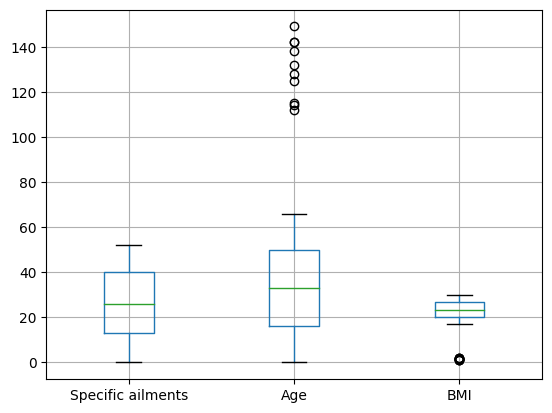

In [208]:
boxplot1 = df.boxplot(column=CONT_NUMERICAL_COLS)

In [209]:
def outlier_data(data: pd.DataFrame, col: str) -> pd.DataFrame:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    outlier = data[(data[col]<lower_bound)|(data[col]>upper_bound)][[col]]
    return outlier

In [210]:
print("Column : Number of outiers")
for col in CONT_NUMERICAL_COLS:
    print(col," : ", len(outlier_data(df[CONT_NUMERICAL_COLS], col)))

Column : Number of outiers
Specific ailments  :  0
Age  :  10
BMI  :  10


In [211]:
def remove_outlier(data: pd.DataFrame, col: str):
    for i in range(len(outlier_data(data, col)[col].unique())): # looping through each outlier value in current column
        out_lier_data = outlier_data(data, col)[col].unique() # getting the outlier data values

        # checking in case the current column has a outlier or not
        out = outlier_data(data, col)[col].unique()[0] if (len(out_lier_data) > 0) else None
        if out == None:
            continue

        index = data[data[col]==out].index.tolist() # get the index of outlier data
        data.drop(index, inplace = True)
    print("Outliers removed...")

In [212]:
test1 = df[CONT_NUMERICAL_COLS].copy()

In [213]:
for i, col in enumerate(CONT_NUMERICAL_COLS):
    print(col)
    remove_outlier(test1, col)

Specific ailments
Outliers removed...
Age
Outliers removed...
BMI
Outliers removed...


In [214]:
for i, col in enumerate(CONT_NUMERICAL_COLS):
    mean_change = round(((df[CONT_NUMERICAL_COLS][col].mean()-test1[col].mean())/df[CONT_NUMERICAL_COLS][col].mean())*100, 6)
    median_change = round(((df[CONT_NUMERICAL_COLS][col].median()-test1[col].median())/df[CONT_NUMERICAL_COLS][col].median())*100, 6)
    print(col)
    print("mean w outlier : ", round(df[CONT_NUMERICAL_COLS][col].mean(), 6))
    print("mean w/o outlier : ", round(test1[col].mean(), 6))
    print("% change in mean after removing outlier : ", mean_change, "%")
    print("median w outlier : ", round(df[CONT_NUMERICAL_COLS][col].median(), 6))
    print("median w/o outlier : ", round(test1[col].median(), 6))
    print("% change in median after removing outlier : ", median_change, "%")
    print('--------------------------------------------------')

Specific ailments
mean w outlier :  26.502701
mean w/o outlier :  26.512929
% change in mean after removing outlier :  -0.038595 %
median w outlier :  26.0
median w/o outlier :  26.0
% change in median after removing outlier :  0.0 %
--------------------------------------------------
Age
mean w outlier :  33.23561
mean w/o outlier :  33.198379
% change in mean after removing outlier :  0.11202 %
median w outlier :  33.0
median w/o outlier :  33.0
% change in median after removing outlier :  0.0 %
--------------------------------------------------
BMI
mean w outlier :  23.461925
mean w/o outlier :  23.470394
% change in mean after removing outlier :  -0.036095 %
median w outlier :  23.41533
median w/o outlier :  23.415591
% change in median after removing outlier :  -0.001117 %
--------------------------------------------------


+ let us not remove the outliers, because very less change was observed
+ we can avoid data loss by doing so

In [215]:
cont_numerical_df = df[CONT_NUMERICAL_COLS].copy() # contains the continuous columns

### 3.2 Let's deal with discrete numerical columns

In [216]:
df[DISC_NUMERICAL_COLS].describe()

,Illness count last year
count,24947.000000
mean,1.752756
std,0.767824
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,5.000000


In [217]:
df[DISC_NUMERICAL_COLS].isna().sum()

Illness count last year    973
dtype: int64

In [218]:
df[DISC_NUMERICAL_COLS].value_counts()

Illness count last year
1.0                        10646
2.0                        10342
3.0                         3475
4.0                          449
5.0                           35
dtype: int64

In [219]:
# let us fill tne nan values by most occuring value
df_testing = df[DISC_NUMERICAL_COLS].fillna(value=1.0)

In [220]:
knn_imp = KNNImputer(weights='distance')
result = knn_imp.fit_transform(df[DISC_NUMERICAL_COLS])
result_df = pd.DataFrame(result, columns=df[DISC_NUMERICAL_COLS].columns)
result_df

,Illness count last year
0,1.0
1,1.0
2,1.0
3,1.0
4,2.0
...,...
25915,1.0
25916,1.0
25917,2.0
25918,2.0


In [221]:
df_testing.value_counts(), result_df.value_counts()
# illness count can't be in decimal, so let us use mode inputed method

(Illness count last year
 1.0                        11619
 2.0                        10342
 3.0                         3475
 4.0                          449
 5.0                           35
 dtype: int64,
 Illness count last year
 1.000000                   10646
 2.000000                   10342
 3.000000                    3475
 1.752756                     973
 4.000000                     449
 5.000000                      35
 dtype: int64)

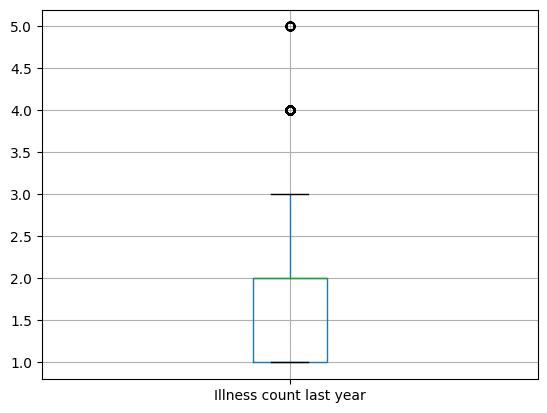

In [222]:
boxplot2 = result_df.boxplot(column=DISC_NUMERICAL_COLS)

In [223]:
print("Column : Number of outiers")
for col in DISC_NUMERICAL_COLS:
    print(col," : ", len(outlier_data(result_df[DISC_NUMERICAL_COLS], col)))

Column : Number of outiers
Illness count last year  :  484


In [224]:
test2 = result_df[DISC_NUMERICAL_COLS].copy()

In [225]:
for i, col in enumerate(DISC_NUMERICAL_COLS):
    print(col)
    remove_outlier(test2, col)

Illness count last year
Outliers removed...


In [226]:
for i, col in enumerate(DISC_NUMERICAL_COLS):
    mean_change = round(((result_df[DISC_NUMERICAL_COLS][col].mean()-test2[col].mean())/result_df[DISC_NUMERICAL_COLS][col].mean())*100, 6)
    median_change = round(((result_df[DISC_NUMERICAL_COLS][col].median()-test2[col].median())/result_df[DISC_NUMERICAL_COLS][col].median())*100, 6)
    print(col)
    print("mean w outlier : ", round(result_df[DISC_NUMERICAL_COLS][col].mean(), 6))
    print("mean w/o outlier : ", round(test2[col].mean(), 6))
    print("% change in mean after removing outlier : ", mean_change, "%")
    print("median w outlier : ", round(result_df[DISC_NUMERICAL_COLS][col].median(), 6))
    print("median w/o outlier : ", round(test2[col].median(), 6))
    print("% change in median after removing outlier : ", median_change, "%")
    print('--------------------------------------------------')

Illness count last year
mean w outlier :  1.752756
mean w/o outlier :  1.708619
% change in mean after removing outlier :  2.518143 %
median w outlier :  2.0
median w/o outlier :  2.0
% change in median after removing outlier :  0.0 %
--------------------------------------------------


+ let us not remove the outliers, because very less change was observed, and by doing so we can avoid data (information) loss

In [227]:
disc_numerical_df = result_df.copy() # storing the discrete numerical dataframe

### 3.3 Let's deal with binary categorical columns

In [228]:
# let us know the % distribution of values
for i in range(len(BIN_CATEGORICAL_COLS)):
    print((df[BIN_CATEGORICAL_COLS][BIN_CATEGORICAL_COLS[i]].value_counts()/df[BIN_CATEGORICAL_COLS].shape[0])*100)

1.0    86.211420
0.0    10.034722
Name: Follow Diet, dtype: float64
0.0    82.959105
1.0    13.287037
Name: Physical activity, dtype: float64
0.0    78.499228
1.0    17.746914
Name: Regular sleeping hours, dtype: float64
0.0    88.140432
1.0     8.105710
Name: Alcohol consumption, dtype: float64
0.0    58.047840
1.0    38.198302
Name: Social interaction, dtype: float64
0.0    91.138117
1.0     5.108025
Name: Taking supplements, dtype: float64
0.0    96.207562
1.0     0.038580
Name: Mental health management, dtype: float64


In [240]:
df[BIN_CATEGORICAL_COLS].isna().sum()

Follow Diet                 973
Physical activity           973
Regular sleeping hours      973
Alcohol consumption         973
Social interaction          973
Taking supplements          973
Mental health management    973
dtype: int64

In [290]:
df_tester = df[BIN_CATEGORICAL_COLS].copy()

In [291]:
# performing modal imputation for nan values
for col in BIN_CATEGORICAL_COLS:
    mode_value = (df_tester.loc[:,col]).value_counts().idxmax() # get most occuring value
    df_tester[col].fillna(value=mode_value, inplace=True)

In [292]:
df_tester.isna().sum()

Follow Diet                 0
Physical activity           0
Regular sleeping hours      0
Alcohol consumption         0
Social interaction          0
Taking supplements          0
Mental health management    0
dtype: int64

In [294]:
for i in range(len(BIN_CATEGORICAL_COLS)):
    print(df_tester[BIN_CATEGORICAL_COLS[i]].value_counts())

1.0    23319
0.0     2601
Name: Follow Diet, dtype: int64
0.0    22476
1.0     3444
Name: Physical activity, dtype: int64
0.0    21320
1.0     4600
Name: Regular sleeping hours, dtype: int64
0.0    23819
1.0     2101
Name: Alcohol consumption, dtype: int64
0.0    16019
1.0     9901
Name: Social interaction, dtype: int64
0.0    24596
1.0     1324
Name: Taking supplements, dtype: int64
0.0    25910
1.0       10
Name: Mental health management, dtype: int64


In [295]:
df_tester.shape

(25920, 7)

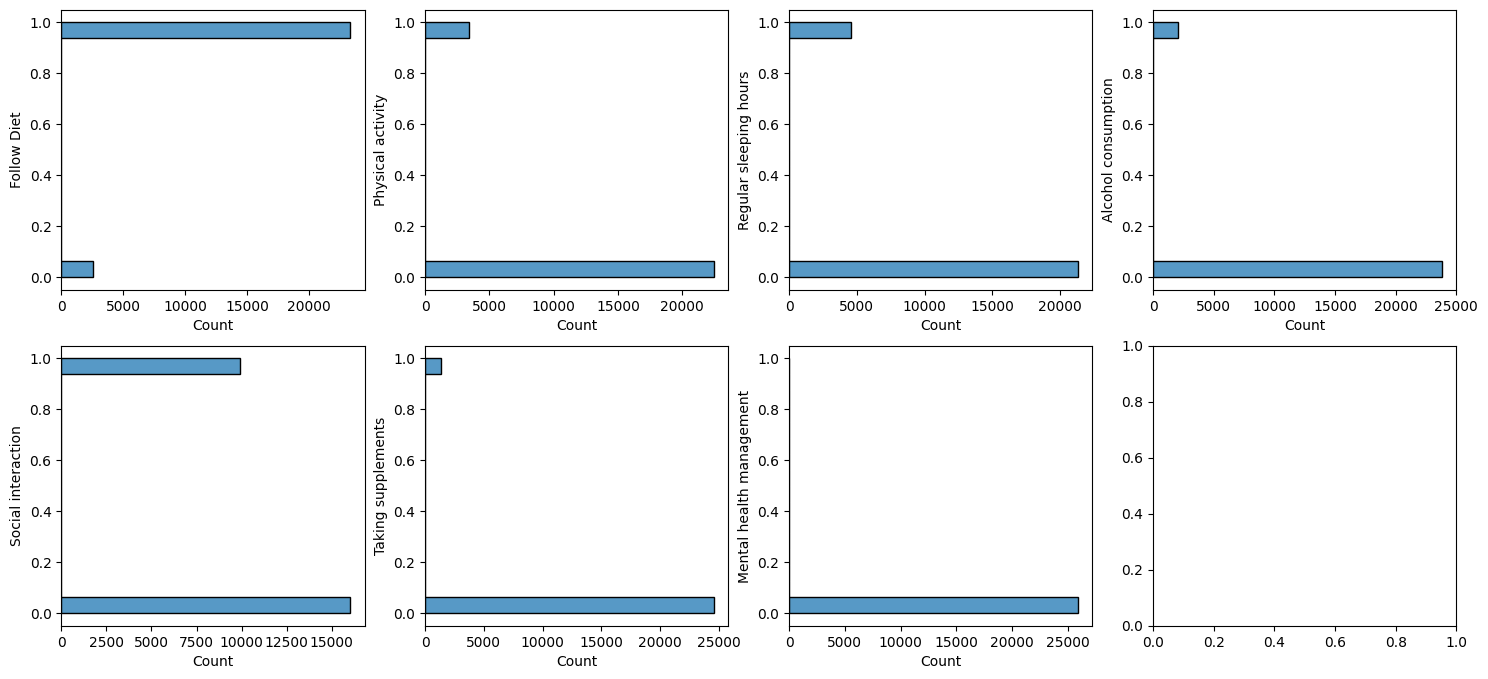

In [299]:
n_rows = len(df_tester.columns)//4 + 1

fig, axes = plt.subplots(nrows = n_rows, ncols = 4, figsize = (18, 4*n_rows))
axes = axes.flatten()

i = 0
for col in list(df_tester.columns):
    ax = axes[i]
    sns.histplot(data = df_tester, y = col, ax = ax)
    i += 1

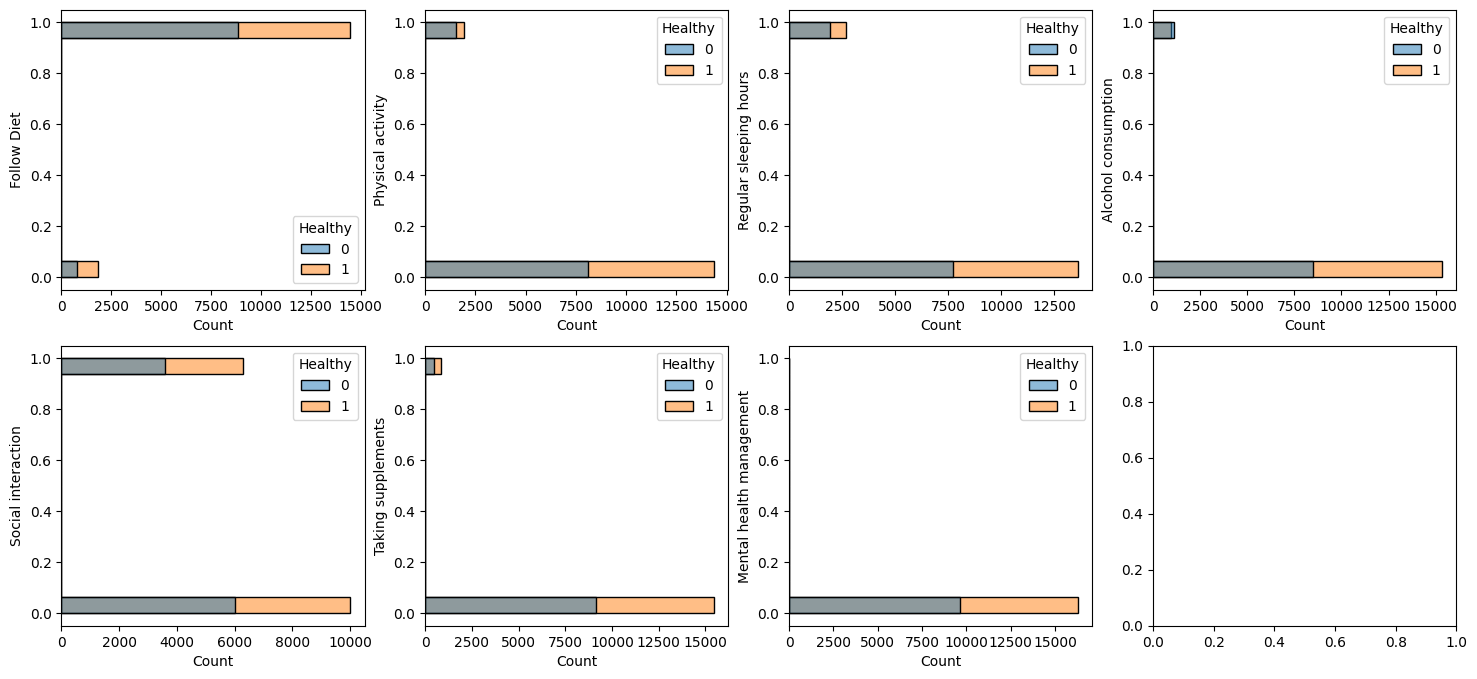

In [297]:
n_rows = len(df_tester.columns)//4 + 1

fig, axes = plt.subplots(nrows = n_rows, ncols = 4, figsize = (18, 4*n_rows))
axes = axes.flatten()

df_target_bin_cat_cols = pd.concat([df_tester, df[['Healthy']]],axis=1)

i = 0
for col in list(df_tester.columns):
    ax = axes[i]
    sns.histplot(data = df_target_bin_cat_cols, y = col, hue = df_target_bin_cat_cols['Healthy'], ax = ax)
    i += 1

In [300]:
bin_categorical_df = df_tester.copy() # contains the binary categorical columns

### 3.4 Let's deal with nominal categorical columns

In [302]:
for i in range(len(NOM_CATEGORICAL_COLS)):
    print(df[NOM_CATEGORICAL_COLS][NOM_CATEGORICAL_COLS[i]].value_counts())

DX6                     9639
DX5                     2167
DX2                     2128
DX4                     2099
DX3                     2072
DX1                     2063
DX1 DX2                  480
DX2 DX4                  476
DX3 DX4                  471
DX1 DX3                  461
DX4 DX5                  459
DX2 DX5                  459
DX2 DX3                  452
DX1 DX5                  450
DX3 DX5                  443
DX1 DX4                  437
DX1 DX2 DX5              116
DX1 DX3 DX4              113
DX1 DX2 DX3              110
DX1 DX2 DX4              110
DX3 DX4 DX5              109
DX2 DX3 DX5              105
DX1 DX3 DX5               98
DX2 DX4 DX5               98
DX2 DX3 DX4               90
DX1 DX4 DX5               89
DX1 DX3 DX4 DX5           27
DX2 DX3 DX4 DX5           26
DX1 DX2 DX4 DX5           23
DX1 DX2 DX3 DX4           20
DX1 DX2 DX3 DX5           16
DX1 DX2 DX3 DX4 DX5        4
Name: Food preference, dtype: int64
NO            14938
YES           10

In [304]:
df[NOM_CATEGORICAL_COLS].isna().sum()

Food preference    10
Smoker?             0
Living in?          0
dtype: int64

In [305]:
df_try = df[NOM_CATEGORICAL_COLS].copy()

In [ ]:
# let us deal with nan values
# but before that let us convert Food prefrence to some label so it becomes easy to work

In [307]:
df_test_food = df_try[~df_try['Food preference'].isna()]['Food preference']
# df_test_food.isna().sum()

In [313]:
splitt = df_test_food.str.split(" ")
# print(splitt)

mlb = MultiLabelBinarizer()
test_food_binarised = mlb.fit_transform(splitt)
# print(test_food_binarised, mlb.classes_)

res = pd.DataFrame(test_food_binarised, columns=mlb.classes_)
res = res.drop([''], axis=1)
# print(res.columns)

df_try_new = pd.concat([df_try, res],axis=1)
# print(df_try_new.shape)
df_try_new.head()

(25920, 9)


,Food preference,Smoker?,Living in?,DX1,DX2,DX3,DX4,DX5,DX6
0,DX6,NO,RURAL,0.0,0.0,0.0,0.0,0.0,1.0
1,DX3 DX4,NO,URBAN,0.0,0.0,1.0,1.0,0.0,0.0
2,DX6,NO,URBAN,0.0,0.0,0.0,0.0,0.0,1.0
3,DX1,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0
4,DX6,YES,RURAL,0.0,0.0,0.0,0.0,0.0,1.0


In [314]:
df_try_new.drop(['Food preference'], axis=1, inplace=True)

In [315]:
df_try_new.isna().sum()

Smoker?        0
Living in?     0
DX1           10
DX2           10
DX3           10
DX4           10
DX5           10
DX6           10
dtype: int64

In [316]:
NOM_CATEGORICAL_COLS_NEW = list(df_try_new.columns)

In [323]:
for col in NOM_CATEGORICAL_COLS_NEW:
    print(df_try_new[col].value_counts())

NO            14938
YES           10972
Cannot say       10
Name: Smoker?, dtype: int64
RURAL    18080
URBAN     7840
Name: Living in?, dtype: int64
0.0    21293
1.0     4617
Name: DX1, dtype: int64
0.0    21197
1.0     4713
Name: DX2, dtype: int64
0.0    21293
1.0     4617
Name: DX3, dtype: int64
0.0    21259
1.0     4651
Name: DX4, dtype: int64
0.0    21221
1.0     4689
Name: DX5, dtype: int64
0.0    16271
1.0     9639
Name: DX6, dtype: int64


In [324]:
# we can fill the missing values using modal imputation
for col in NOM_CATEGORICAL_COLS_NEW:
    mode_value = (df_try_new.loc[:,col]).value_counts().idxmax() # get most occuring value
    df_try_new[col].fillna(value=mode_value, inplace=True)

In [333]:
# Encoding the other two columns
ohe = OneHotEncoder(sparse_output=False)
smoker_ohe = ohe.fit_transform(np.array(df_try_new['Smoker?']).reshape(-1,1))
df_smoker_ohe = pd.DataFrame(smoker_ohe, columns=ohe.categories_)
# df_smoker_ohe
df_smoker_ohe.drop(['Cannot say'],axis=1,inplace=True)

In [335]:
df_smoker_ohe.columns=['Smoker_NO', 'Smoker_YES']

In [337]:
df_try_new = pd.concat([df_try_new, df_smoker_ohe], axis=1)

In [340]:
ohe1 = OneHotEncoder(sparse_output=False)
living_ohe = ohe1.fit_transform(np.array(df_try_new['Living in?']).reshape(-1,1))
df_living_ohe = pd.DataFrame(living_ohe, columns=ohe1.categories_)
# df_living_ohe.head()
df_living_ohe.drop(['RURAL'],axis=1,inplace=True)
df_living_ohe.columns=['Living_URBAN']
# df_living_ohe.head()

,Living_URBAN
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0


In [341]:
df_try_new = pd.concat([df_try_new, df_living_ohe], axis=1)

In [344]:
df_try_new.drop(['Smoker?', 'Living in?'], axis=1,inplace=True)

In [345]:
df_try_new.shape

(25920, 9)

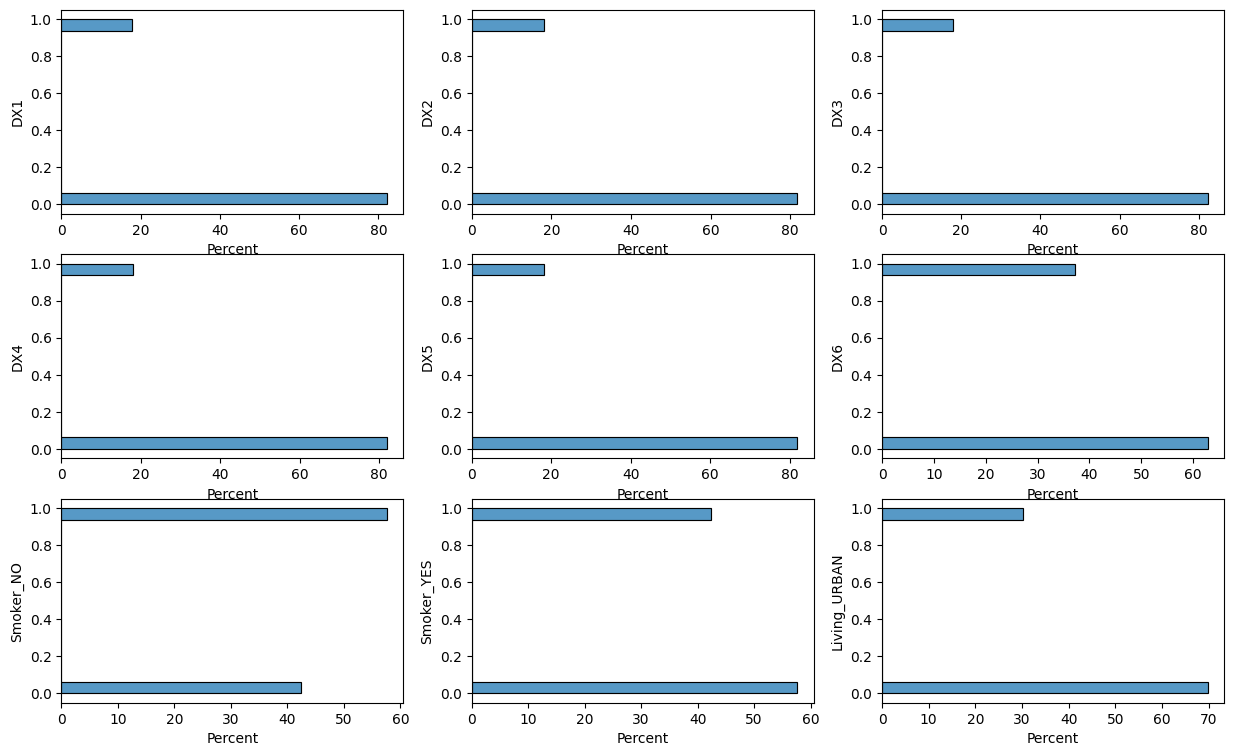

In [352]:
n_rows = len(df_try_new.columns)//3

fig, axes = plt.subplots(nrows = n_rows, ncols = 3, figsize = (15, 3*n_rows))
axes = axes.flatten()

i = 0
for col in list(df_try_new.columns):
    ax = axes[i]
    sns.histplot(data = df_try_new, y = col, ax = ax, stat='percent')
    i += 1

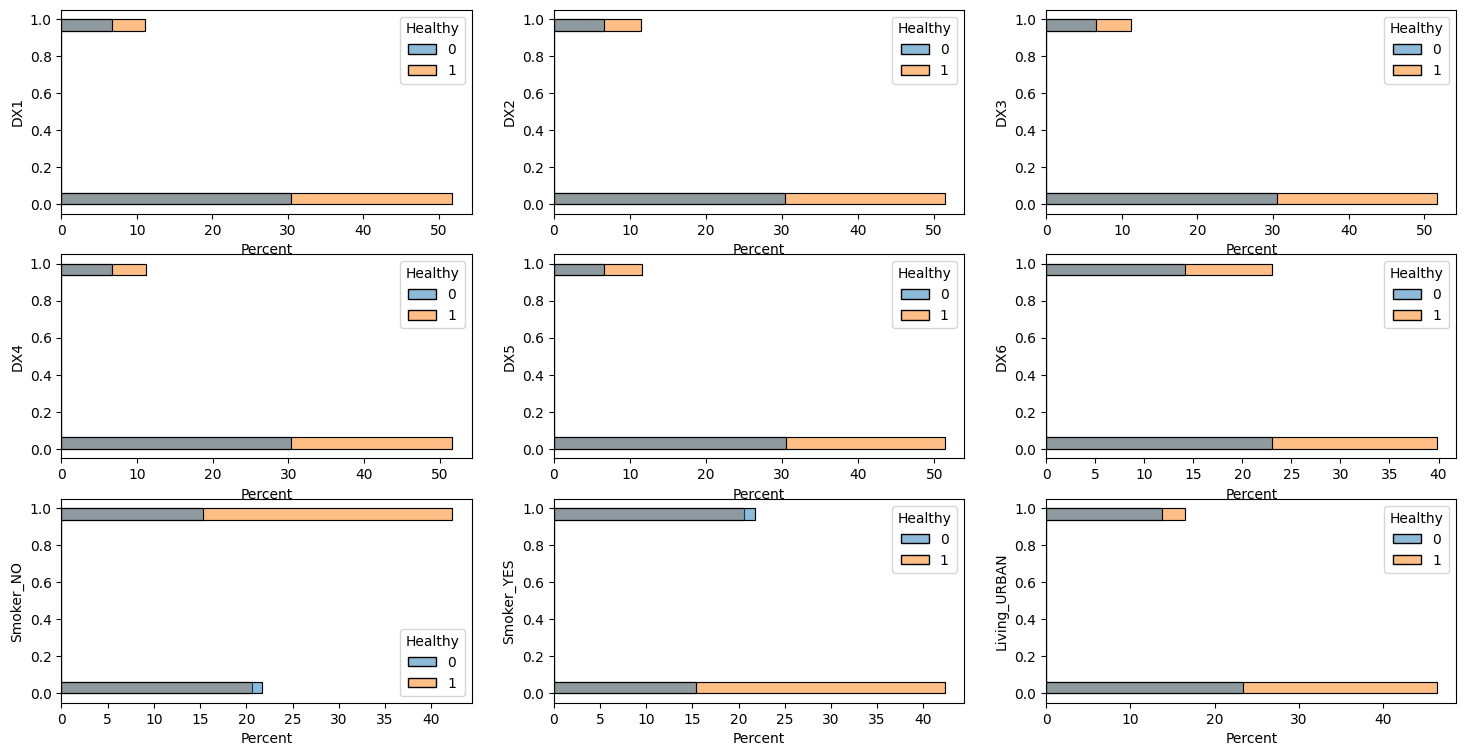

In [353]:
n_rows = len(df_try_new.columns)//3

fig, axes = plt.subplots(nrows = n_rows, ncols = 3, figsize = (18, 3*n_rows))
axes = axes.flatten()

df_target_nom_cat_cols = pd.concat([df_try_new, df[['Healthy']]],axis=1)

i = 0
for col in list(df_try_new.columns):
    ax = axes[i]
    sns.histplot(data = df_target_nom_cat_cols, y = col, hue = df_target_nom_cat_cols['Healthy'], ax = ax, stat='percent')
    i += 1

In [354]:
nom_categorical_df = df_try_new.copy()

# 4. Combine all the columns

In [356]:
data_final = pd.concat([cont_numerical_df, disc_numerical_df, bin_categorical_df, nom_categorical_df], axis=1)

In [359]:
data_final.isna().sum()

Specific ailments           0
Age                         0
BMI                         0
Illness count last year     0
Follow Diet                 0
Physical activity           0
Regular sleeping hours      0
Alcohol consumption         0
Social interaction          0
Taking supplements          0
Mental health management    0
DX1                         0
DX2                         0
DX3                         0
DX4                         0
DX5                         0
DX6                         0
Smoker_NO                   0
Smoker_YES                  0
Living_URBAN                0
dtype: int64

In [360]:
data_final = pd.concat([data_final, df[['Healthy']]], axis=1)

In [362]:
print(data_final.shape)
data_final

(25920, 21)


,Specific ailments,Age,BMI,Illness count last year,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,...,DX1,DX2,DX3,DX4,DX5,DX6,Smoker_NO,Smoker_YES,Living_URBAN,Healthy
0,44,49,20.500470,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
1,39,20,26.076580,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1
2,29,1,21.420866,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0
3,27,30,25.203247,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,9,40,19.355846,2.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,12,58,25.515286,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
25916,39,16,27.094959,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
25917,44,8,28.602921,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
25918,52,52,21.909832,2.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [363]:
# convert it to csv file
data_final.to_csv('Train_processed.csv')

# 5. Data Visualization

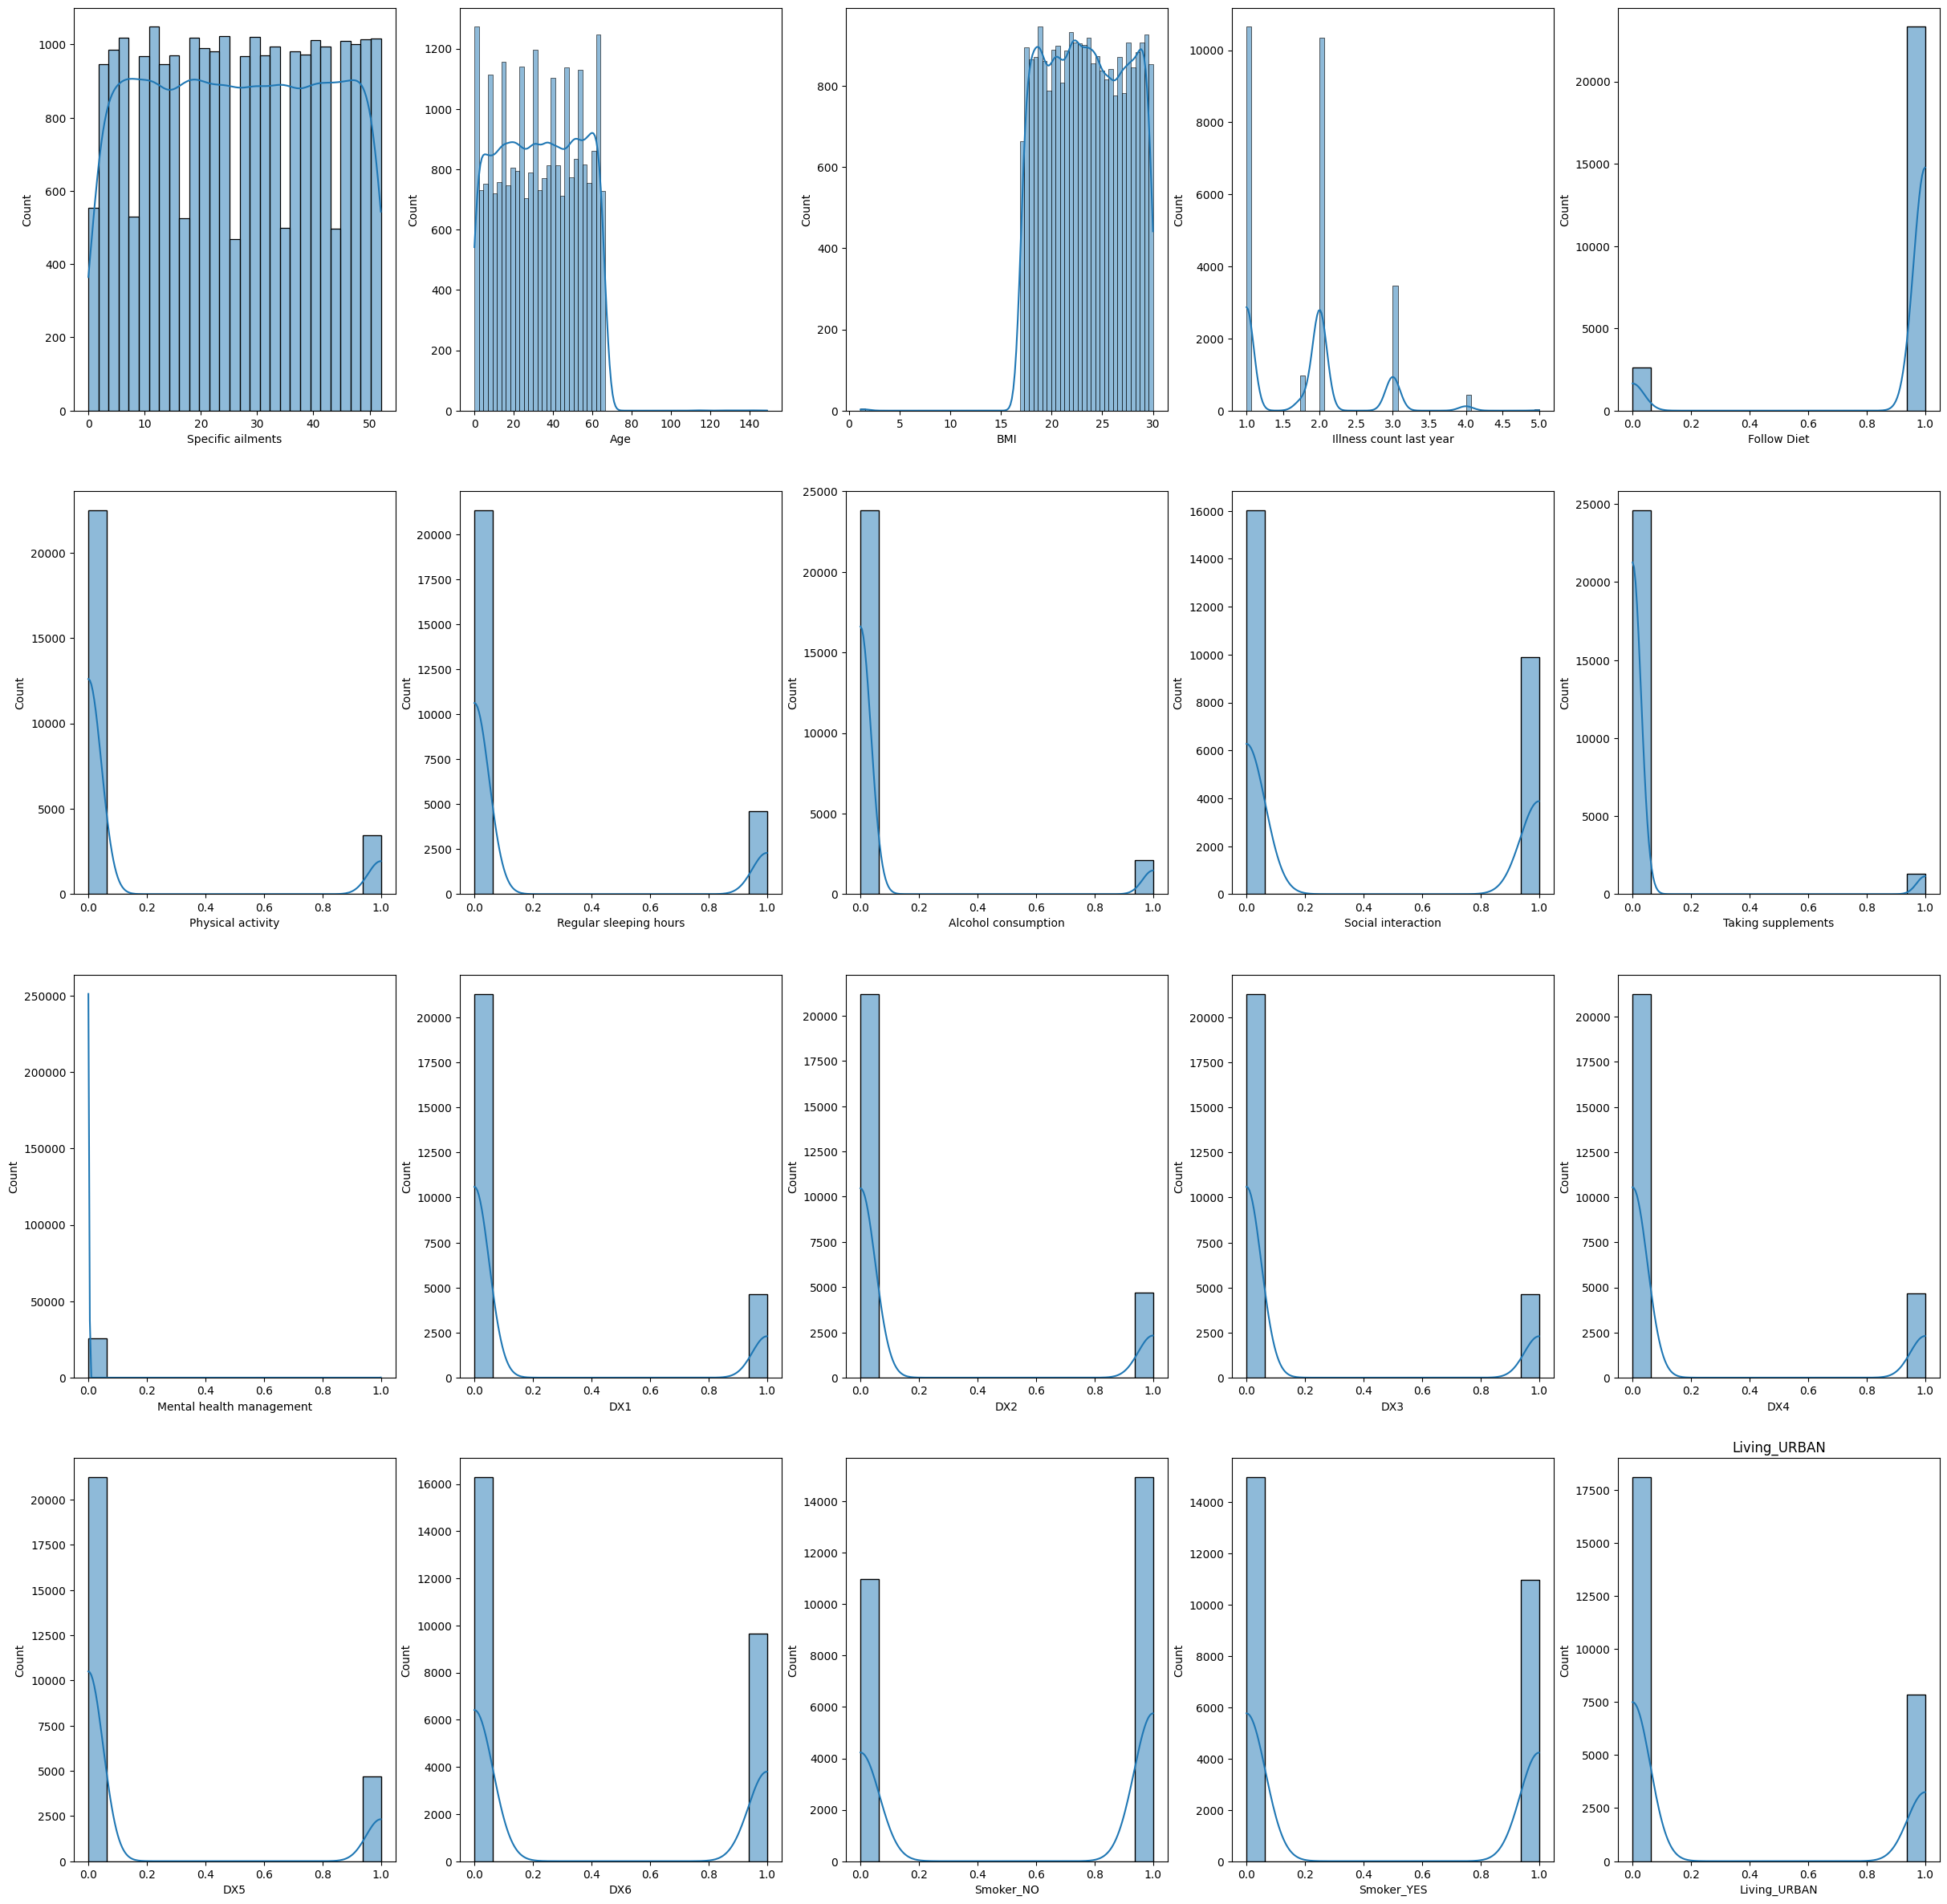

In [364]:
import seaborn as sns
fig, axs = plt.subplots(4, 5, figsize=(30, 30))
axs = axs.flatten()
i=0
df_train_cols = list(data_final.columns)[:-1]
for col in df_train_cols:
    ax = axs[i]
    sns.histplot(data_final[col], kde=True, ax=ax)
    plt.title(col)
    i=i+1

<Axes: xlabel='Healthy', ylabel='count'>

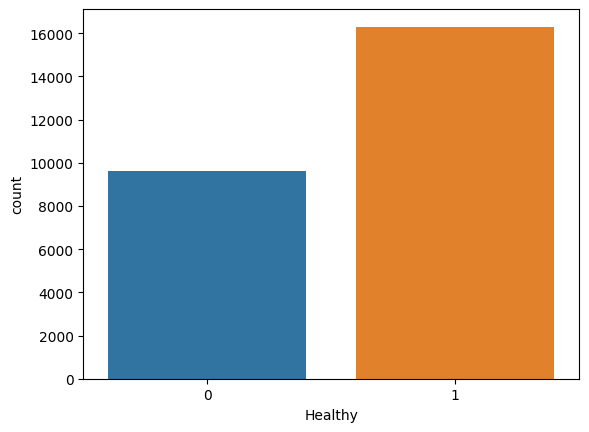

In [365]:
sns.countplot(x=data_final['Healthy'])

<Axes: >

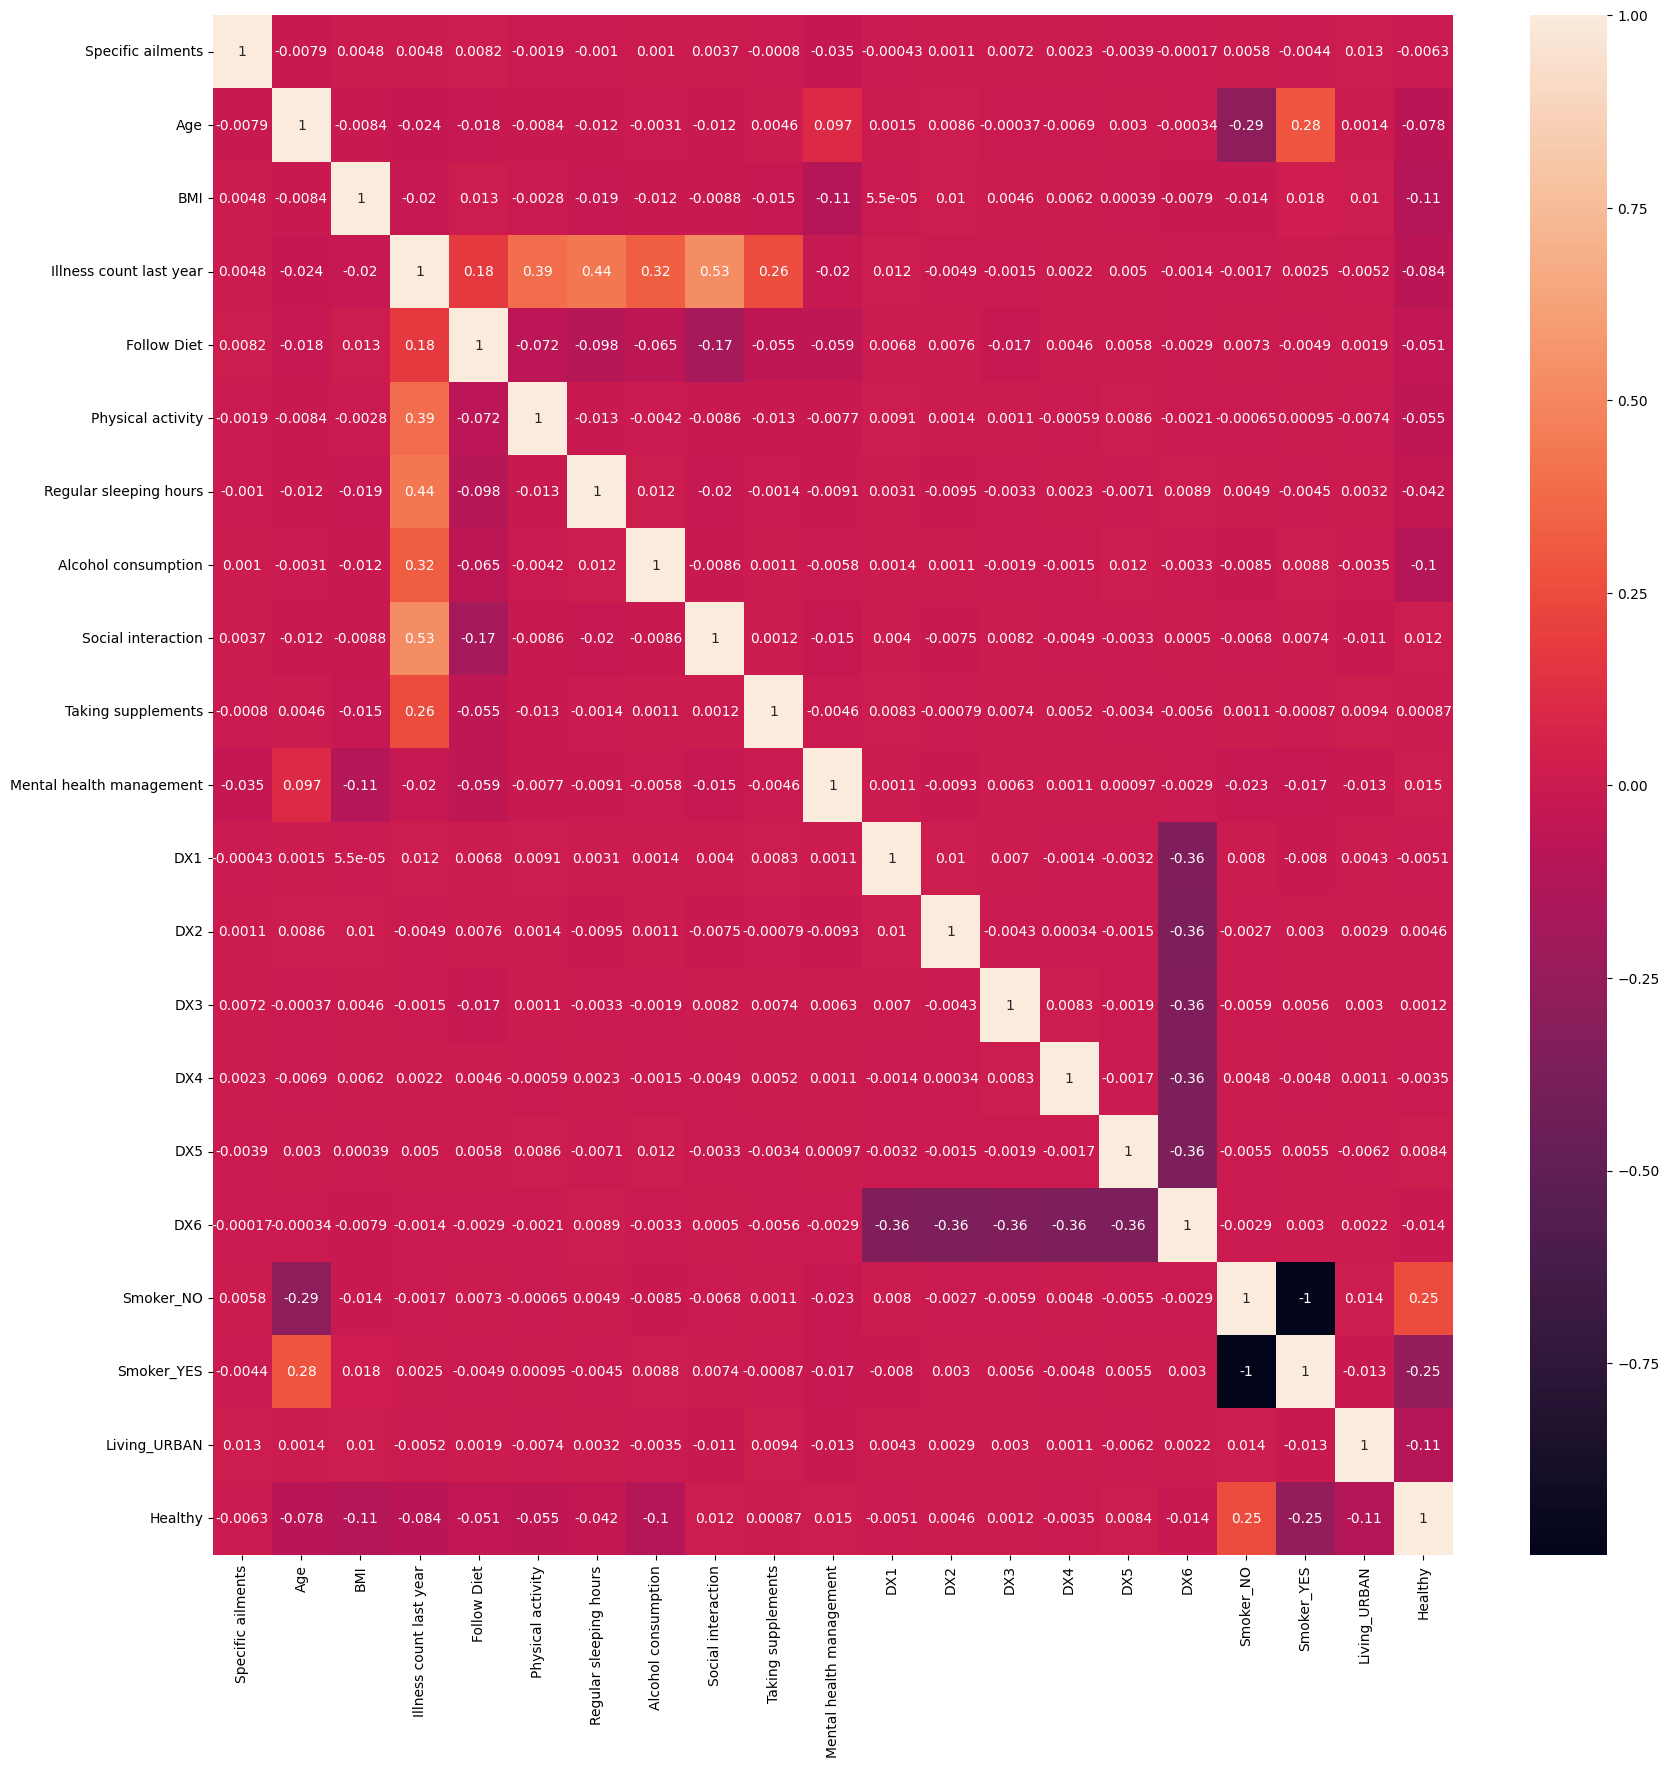

In [368]:
# sns.heatmap(data_final.corr(),annot=True)

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data_final.corr(), annot=True, ax=ax)

+ the tendency to **smoke** **increases** with growing **age**
+ **illness count last year** shows a **positive correlation** with **taking supplements**, **consuming alcohol**, **sleeping hours**, **physical activity**
    + more ill one more, more supplements is needed
    + consuming alcohol is related with illness
    + illness leads to more regular sleeping hours
    + social interaction might lead to one catching a contagious disease.
    + physical activity resulting in injury can cause illness
+ individual **not smoking** has more chance of being **healthy**
+ individual preferring **DX6** type of foods doesn't prefer other types.